In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np

In [6]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [7]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [8]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [9]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [10]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=1:
        a.append(i)

In [11]:
df = df.drop(a)

In [12]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
2976,1958,1,73,6.8,1.0,29,-0.7,jammu and kashmir,bagdam,10,1,12,14,19,24,17,9
2977,1958,2,16,10.0,0.2,32,-1.6,jammu and kashmir,bagdam,10,1,12,14,19,24,17,9
2978,1958,3,76,14.6,5.3,69,-2.0,jammu and kashmir,bagdam,10,1,12,14,19,24,17,9
2979,1958,4,100,19.5,10.1,98,-2.6,jammu and kashmir,bagdam,10,1,12,14,19,24,17,9
2980,1958,5,72,20.6,9.8,105,-3.1,jammu and kashmir,bagdam,10,1,12,14,19,24,17,9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29760 entries, 2976 to 441935
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            29760 non-null  int64  
 1   Month           29760 non-null  int64  
 2   ppt(mm)         29760 non-null  int64  
 3   tmax(degC)      29760 non-null  float64
 4   tmin(degC)      29760 non-null  float64
 5   aet(mm)         29760 non-null  int64  
 6   PDSI(unitless)  29760 non-null  float64
 7   state           29760 non-null  object 
 8   district        29760 non-null  object 
 9   cluster14       29760 non-null  int64  
 10  cluster15       29760 non-null  int64  
 11  cluster18       29760 non-null  int64  
 12  cluster20       29760 non-null  int64  
 13  cluster25       29760 non-null  int64  
 14  cluster27       29760 non-null  int64  
 15  cluster30       29760 non-null  int64  
 16  cluster35       29760 non-null  int64  
dtypes: float64(3), int64(12), o

In [14]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(29760, 8)

In [15]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [16]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
2976,1958,1,73,6.8,1.0,29,-0.7,bagdam,1-1958
2977,1958,2,16,10.0,0.2,32,-1.6,bagdam,2-1958
2978,1958,3,76,14.6,5.3,69,-2.0,bagdam,3-1958
2979,1958,4,100,19.5,10.1,98,-2.6,bagdam,4-1958
2980,1958,5,72,20.6,9.8,105,-3.1,bagdam,5-1958


In [17]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
2976,1958,1,73,6.8,1.0,29,-0.7,bagdam,1958-01-01,1
2977,1958,2,16,10.0,0.2,32,-1.6,bagdam,1958-02-01,1
2978,1958,3,76,14.6,5.3,69,-2.0,bagdam,1958-03-01,1
2979,1958,4,100,19.5,10.1,98,-2.6,bagdam,1958-04-01,1
2980,1958,5,72,20.6,9.8,105,-3.1,bagdam,1958-05-01,1


In [19]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
2976,1958,1,73,29,-0.7,bagdam,1958-01-01,1,3.90
2977,1958,2,16,32,-1.6,bagdam,1958-02-01,1,5.10
2978,1958,3,76,69,-2.0,bagdam,1958-03-01,1,9.95
2979,1958,4,100,98,-2.6,bagdam,1958-04-01,1,14.80
2980,1958,5,72,105,-3.1,bagdam,1958-05-01,1,15.20


In [20]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
441931,2019,8,9,10,0.8,kargil,2019-08-01,1,19.55
441932,2019,9,2,3,-0.4,kargil,2019-09-01,1,19.05
441933,2019,10,10,10,0.0,kargil,2019-10-01,1,10.35
441934,2019,11,28,27,1.4,kargil,2019-11-01,1,3.70
441935,2019,12,17,0,0.9,kargil,2019-12-01,1,-6.90


In [21]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,176,3.05,24,bagdam
1,1981-02-01,124,5.45,32,bagdam
2,1981-03-01,301,8.85,58,bagdam
3,1981-04-01,211,13.80,97,bagdam
4,1981-05-01,80,17.25,109,bagdam


In [22]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
3708,2019,1,172,19,-0.7,bagdam,2019-01-01,1,1.95
3709,2019,2,157,29,1.7,bagdam,2019-02-01,1,5.15
3710,2019,3,119,61,1.2,bagdam,2019-03-01,1,8.15
3711,2019,4,104,85,0.7,bagdam,2019-04-01,1,14.15
3712,2019,5,98,109,0.7,bagdam,2019-05-01,1,15.30
...,...,...,...,...,...,...,...,...,...
441931,2019,8,9,10,0.8,kargil,2019-08-01,1,19.55
441932,2019,9,2,3,-0.4,kargil,2019-09-01,1,19.05
441933,2019,10,10,10,0.0,kargil,2019-10-01,1,10.35
441934,2019,11,28,27,1.4,kargil,2019-11-01,1,3.70


In [23]:
from fbprophet import Prophet

In [24]:

model = Prophet()

In [25]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
18235,2018-08-01,6,19.95,7,kargil
18236,2018-09-01,8,15.30,8,kargil
18237,2018-10-01,5,8.35,5,kargil
18238,2018-11-01,18,2.70,18,kargil
18239,2018-12-01,6,-3.90,0,kargil


In [28]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [30]:

forecast = model.predict(fut)

In [31]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,18.676700,11.013766,33.619516,18.676683,18.676718,3.146896,3.146896,3.146896,3.146896,3.146896,3.146896,0.0,0.0,0.0,21.823596
465,2019-09-30,18.678539,8.024619,30.275857,18.678514,18.678563,0.436270,0.436270,0.436270,0.436270,0.436270,0.436270,0.0,0.0,0.0,19.114810
466,2019-10-31,18.680440,4.288014,26.723835,18.680406,18.680471,-3.242517,-3.242517,-3.242517,-3.242517,-3.242517,-3.242517,0.0,0.0,0.0,15.437924
467,2019-11-30,18.682280,1.238443,23.668875,18.682238,18.682318,-6.200836,-6.200836,-6.200836,-6.200836,-6.200836,-6.200836,0.0,0.0,0.0,12.481444
468,2019-12-31,18.684180,0.628906,22.965768,18.684130,18.684228,-7.262144,-7.262144,-7.262144,-7.262144,-7.262144,-7.262144,0.0,0.0,0.0,11.422036


In [32]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,21.823596,11.013766,33.619516
465,2019-09-30,19.114810,8.024619,30.275857
466,2019-10-31,15.437924,4.288014,26.723835
467,2019-11-30,12.481444,1.238443,23.668875
468,2019-12-31,11.422036,0.628906,22.965768


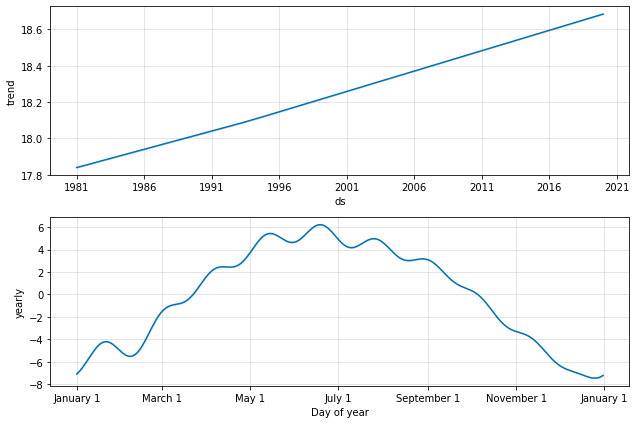

In [33]:
fig2 = model.plot_components(forecast)

In [34]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12, 1) (480, 1)
84.59215772354524


,mid_temp,Month,yhat
0,1.95,1,13.694623
1,21.35,1,13.694623
2,21.15,1,13.694623
3,22.65,1,13.694623
4,26.40,1,13.694623
...,...,...,...
475,23.30,12,11.422036
476,2.30,12,11.422036
477,2.00,12,11.422036
478,23.15,12,11.422036


In [35]:
import matplotlib.pyplot as plt

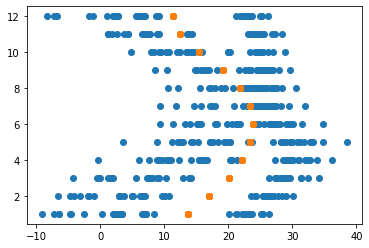

In [36]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [37]:
import pickle

In [39]:
filename = 'Cluster 15 - 1.sav'
pickle.dump(model, open(filename, 'wb'))

In [40]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [41]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,17.840280,-0.942574,20.734262,17.840280,17.840280,-7.090787,-7.090787,-7.090787,-7.090787,-7.090787,-7.090787,0.0,0.0,0.0,10.749493
1,1981-02-01,17.841981,1.438308,24.277718,17.841981,17.841981,-5.144021,-5.144021,-5.144021,-5.144021,-5.144021,-5.144021,0.0,0.0,0.0,12.697960
2,1981-03-01,17.843518,5.703297,27.741142,17.843518,17.843518,-1.509867,-1.509867,-1.509867,-1.509867,-1.509867,-1.509867,0.0,0.0,0.0,16.333651
3,1981-04-01,17.845219,8.813921,30.815028,17.845219,17.845219,1.653450,1.653450,1.653450,1.653450,1.653450,1.653450,0.0,0.0,0.0,19.498669
4,1981-05-01,17.846865,9.855943,31.556462,17.846865,17.846865,3.753964,3.753964,3.753964,3.753964,3.753964,3.753964,0.0,0.0,0.0,21.600829
